## **NOMES E RMS**

* ANA CAROLINA ASSIS RM93633
* ELOISA ARAUJO RM94604


# **CNN - Redes Neurais Convulocionais**

### **1** - Carregando as Bibliotecas

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt

### **2** - Carregando o Dataset

In [ ]:
# Importando o dataset
from keras.datasets import fashion_mnist #mudando

# Carregar o conjunto de dados
(imagem_treino, classe_treino), (imagem_teste, classe_teste) = fashion_mnist.load_data()

# Mostra as caracteristicas do dataset
print(imagem_treino.shape)
print(np.unique(classe_treino))

print(imagem_teste.shape)
print(np.unique(classe_teste))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


As imagens de treino possuem 50 mil imagens, sendo 32 x 32 Pixels, 3 canais de cor (RGB)

As classes de treino vão de 0 a 9, totalizando 10 Classes.

0


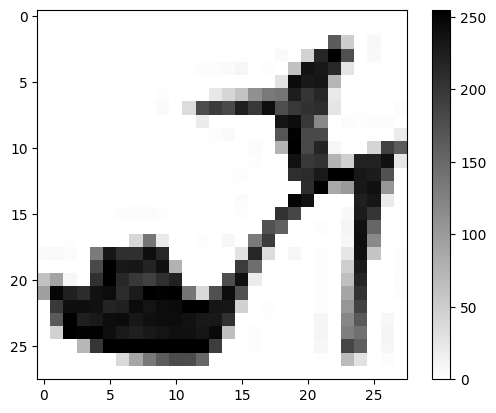

In [ ]:
# Exibe uma amostra do dataset
plt.figure()
plt.imshow(imagem_treino[9], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

### **3 - Processando os dados**

Vamos normalizar o range de cores. O RGB assume valores de 0 a 255. Vamos Normaliza-lo para ficar entre 0 e 1. Para isso, podemos dividr as imagens por 255

In [ ]:
# Normalizando a escala para ficar entre 0 e 1
imagem_treino = imagem_treino/255
imagem_teste = imagem_teste/255

0


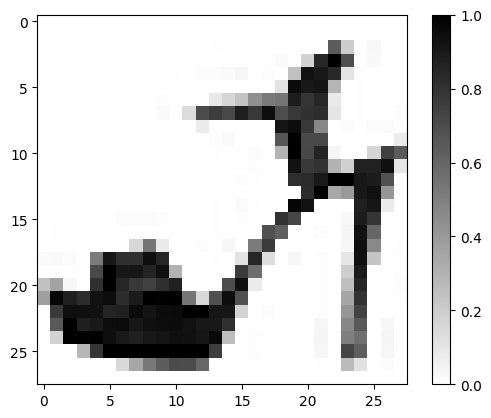

In [ ]:
plt.figure()
plt.imshow(imagem_treino[9], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

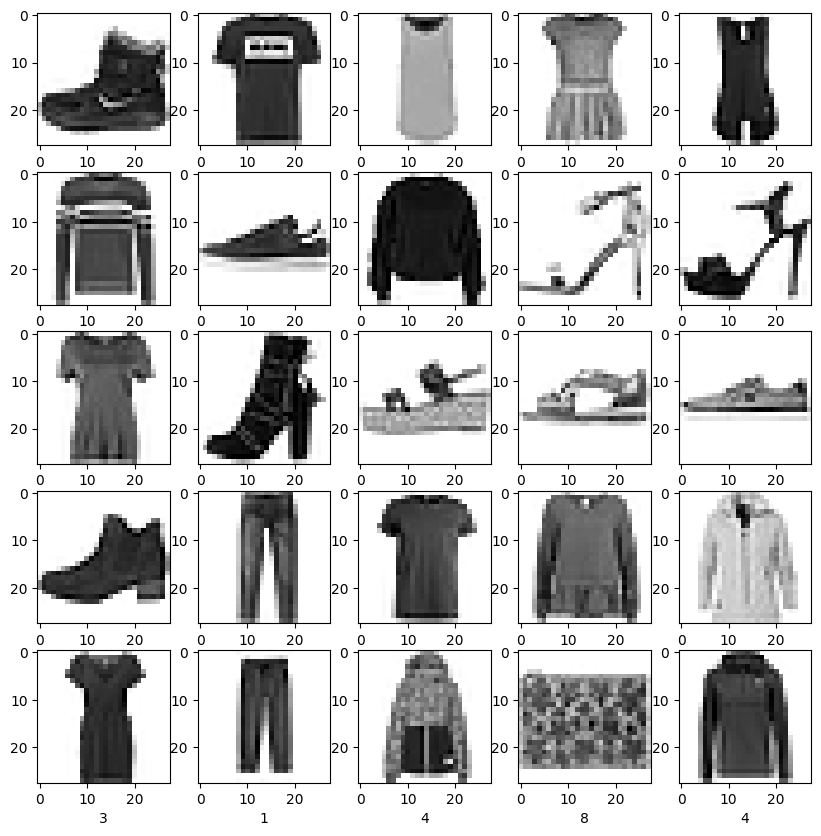

In [ ]:
# Mostrando o dataset normalizado
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(imagem_treino[i], cmap = 'binary')
  plt.xlabel(classe_treino[i])

### **4 - Criando o Modelo**

In [ ]:
# Hiperparâmetros
N_FILTROS = 32
K = 3
N_DENSE = 64
N_CLASSES = 10

#NN 1 imagem para modelo

# Definição do modelo
model = models.Sequential([
    # Camada de Convolução 2D: com N filtros de NxN, função de ativação ReLU, e input_shape de (N, N, N)
    layers.Conv2D(N_FILTROS, (K, K), activation='relu', input_shape=(28,28,1), padding='same'),
    layers.MaxPooling2D((2,2), strides=2), # Primeira Camada de Max Pooling 2D: com uma janela de 2x2 e stride de 2

    layers.Conv2D(N_FILTROS, (K, K), activation='relu', padding='same'), # Segunda Camada de Convolução 2D: com N filtros de NxN, função de ativação ReLU
    layers.MaxPooling2D((2,2), strides=2), # Segunda Camada de Max Pooling 2D: com uma janela de 2x2 e stride de 2

    layers.Flatten(), # Camada Flatten: para transformar a saída 2D em um vetor 1D
    layers.Dense(N_DENSE, activation='relu'), # Camada Densa: com N neurônios e função de ativação ReLU
    layers.Dense(N_CLASSES, activation='softmax') # Camada Densa: com N neurônios e função de ativação softmax
])

model.summary()

#28,28,1 altura x largura x cor

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,634 (432.16 KB)

 Trainable params: 110,634 (432.16 KB)

 Non-trainable params: 0 (0.00 B)

### **5 - Compilando o Modelo**

In [ ]:
# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,634 (432.16 KB)

 Trainable params: 110,634 (432.16 KB)

 Non-trainable params: 0 (0.00 B)

### **6 - Treinando o Modelo**

In [ ]:
# Treinando nosso modelo!
epochs_hist = model.fit(imagem_treino, classe_treino, epochs = 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7701 - loss: 0.6330
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8871 - loss: 0.3160
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9048 - loss: 0.2637
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9179 - loss: 0.2254
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9262 - loss: 0.1981
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9330 - loss: 0.1814
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9390 - loss: 0.1638
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9453 - loss: 0.1482
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9509 - loss: 0.1342
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9535 - loss: 0.1249
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9567 - loss: 0.1166
Epoch 12/15
1875/1875 ━━━━━━━━

Vamos plotar um gráfico da Loss e da Acuracy

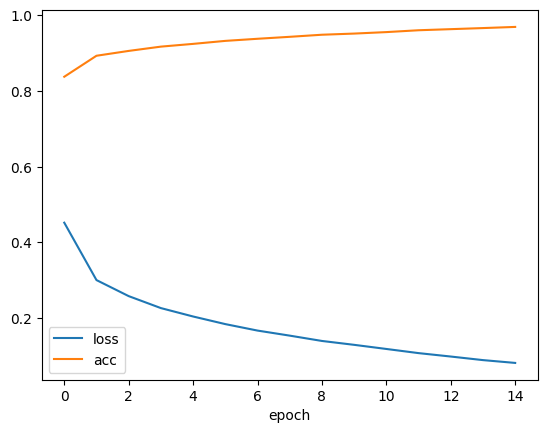

In [ ]:
history_df = pd.DataFrame(epochs_hist.history)

plt.plot(history_df['loss']) #perda
plt.plot(history_df['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='lower left')
plt.show()

### **7 - Testando o Modelo**

In [ ]:
# Testando o Modelo
test_loss, test_acc = model.evaluate(imagem_teste, classe_teste)

print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9173 - loss: 0.3318
0.32118502259254456
0.9168000221252441


Por que obtivemos as Loss e Acuracia acima?

### **8 - Colocando o Modelo a Prova**

In [ ]:
# Funções para facilitar a visualização
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                       100*np.max(predictions_array),
                                       true_label,
                                       color = color))

def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i].item()
   plt.grid(False)
   plt.xticks(range(10),range(10))
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color = "#77777777")
   plt.ylim([0,1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

In [ ]:
predictions = model.predict(imagem_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
for i in range(250):
  if(np.argmax(predictions[i]) != classe_teste[i]):
    print(i)

23
25
32
40
42
48
49
66
68
89
98
103
107
141
147
150
151
153
192
244


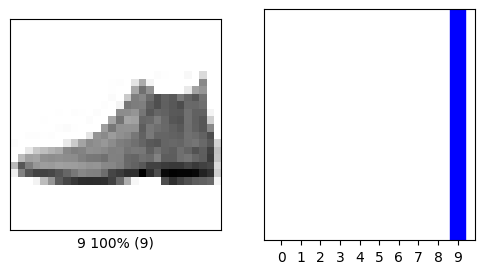

In [ ]:
# Agora vamos avaliar as imagens que ele errou
i = 0 # Substitua por um indice
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, classe_teste, imagem_teste[:,:,:])
plt.subplot(1,2,2)
plot_value_array(i, predictions, classe_teste) # Classificação : Após o treinamento do modelo, use-o para classificar novas imagens ou avaliar as imagens que ele errou no treinamento do próprio dataset